In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as ur
from astropy import constants as const
from astropy.table import Table
from bbmag import bb_abmag, bb_abmag_fluence
from image_utils import construct_image, find, gaussian_psf
from tdsat_sensitivity import bgd_sky_qe_rate
from tdsat_telescope import load_telescope_parameters

# Set up telescope parameters
diameter, qe, psf_fwhm, pixel_size, efficiency = load_telescope_parameters(11)
duet_band1 = [193,233] * ur.nm
duet_band2 = [260,320] * ur.nm
read_noise = 3.

point_drift = 1 * ur.arcsec # To be added to the PSF in quadrature
point_jitter = 5 * ur.arcsec
psf_fwhm = (psf_fwhm**2 + point_drift**2 + point_jitter**2)**0.5 # [4,6,10] * ur.arcsec  
print('Effective PSF FWHM {}'.format(psf_fwhm))

# Stuff from DUET AB Mag Limit On-Axis
trans_eff = (0.975)**8
area = np.pi * (diameter*0.5)**2
area_onaxis = np.pi * (0.5*24.2*ur.cm)**2
efficiency = area_onaxis / area

# Define image simulation parameters
exposure = 300 * ur.s
frame = np.array((20,20)) # Dimensions of the image I'm simulating in DUET pixels (20x20 ~ 2x2 arcmin)

# Calculate sky background
sky_bg1 = bgd_sky_qe_rate(low_zodi=True,band=duet_band1,qe_band=1,diameter=diameter,\
                            pixel_size=pixel_size,real_red=True)
sky_rate1 = trans_eff * efficiency * sky_bg1
sky_bg2 = bgd_sky_qe_rate(low_zodi=True,band=duet_band2,qe_band=2,diameter=diameter,\
                            pixel_size=pixel_size,real_red=True)
sky_rate2 = trans_eff * efficiency * sky_bg2
print("Sky background rate: {}, {}".format(sky_rate1,sky_rate2))

# Background galaxy
galaxy = 'spiral'
gal_params = None

Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Efficiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2
Effective PSF FWHM 6.6623527375845235 arcsec
Sky background rate: 0.030369732491096913 1 / s, 0.2478588509265617 1 / s


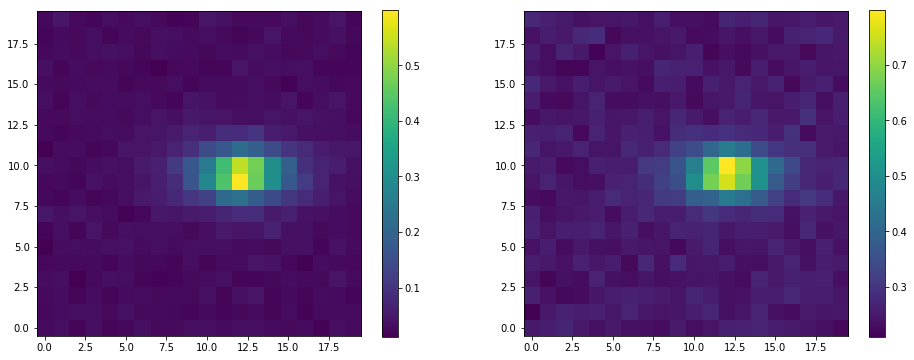

In [29]:
# Simulate reference images, without source, 5 exposures
# Currently a perfect co-add
n_exp = 5
ref_image1 = construct_image(frame, pixel_size, exposure, psf_fwhm, read_noise, \
                            gal_type=galaxy, sky_rate=sky_rate1, n_exp=n_exp)
ref_image_rate1 = ref_image1 / (n_exp * exposure.value)

ref_image2 = construct_image(frame, pixel_size, exposure, psf_fwhm, read_noise, \
                            gal_type=galaxy, sky_rate=sky_rate2, n_exp=n_exp)
ref_image_rate2 = ref_image2 / (n_exp * exposure.value)

plt.figure(figsize=[16,6])
plt.subplot(121)
plt.imshow(ref_image_rate1, cmap='viridis', aspect=1, origin='lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(ref_image_rate2, cmap='viridis', aspect=1, origin='lower')
plt.colorbar()

In [22]:
# Load up SNIIp light curves
# Red supergiant shock breakout

'SNIIp_lightcurve_DUET.fits'

"\n# Load up a set of light curves - snatched from SNe_lightcurves_and_sensitivities\ndist0 = 10*ur.pc\niip_rad = np.loadtxt('input_data/IIp_radius.txt')\niip_tef = np.loadtxt('input_data/IIp_teff.txt')\n\niip_lc = Table([iip_tef[:,0]*ur.s,np.zeros(len(iip_tef))*ur.ABmag,np.zeros(len(iip_tef))*ur.ABmag,np.zeros(len(iip_tef))*1/(ur.s*ur.cm**2),np.zeros(len(iip_tef))*1/(ur.s*ur.cm**2)],\n               names=('Time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'SNIIp - mags and photon flux at 10pc'})\nfor i in range(len(iip_tef)):\n    bolflux = (iip_tef[i,1]*ur.K)**4 * const.sigma_sb.cgs * ((iip_rad[i,1]*ur.cm)/dist0.to(ur.cm))**2\n    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=iip_tef[i,1]*ur.K, bolflux=bolflux)\n    band1_mag, band2_mag = bb_abmag(bbtemp=iip_tef[i,1]*ur.K, bandone=duet_band1, \n                                  bandtwo=duet_band2, bolflux=bolflux, val=True)\n    iip_lc[i]['mag_D1'],iip_lc[i]['mag_D2'] = band1_mag,band2_mag\n    iip_lc[

In [ ]:
# Source lightcurve loop
src_rate1 = trans_eff * efficiency * area * src_fluence1
src_rate2 = trans_eff * efficiency * area * src_fluence2
print("Source rate: {}, {}".format(src_rate1,src_rate2))

# Lump em together
src_rates = np.transpose([src_rate1, src_rate2])

for rate1, rate2 in src_rates:
    # Make image
    
    # Perform photometry
    
    # Create array of measured count rate, error, signal to noise 

# for each magnitude plot in both bands: actual count rate line, measured count rate line and errors
# Signal to noise